In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

# Class 7: Deterministic Time Series Models


Time series models are at the foundatation of dynamic macroeconomic theory. A time series model is an equation or system of equations that describes how the variables in the model change with time. Here, we examine some theory about **deterministic**, i.e., non-random, time series models and we explore methods for simulating them. Later, we'll examine the properties of **stochastic** time series models by introducing random variables to the discrete time models covered below.


## Discrete Versus Continuous Time


To begin, suppose that we are interested in a variable $y$ that takes on the value $y_t$ at date $t$. The date index $t$ is a real number. We'll say that $y_t$ is a **discrete time** variable if $t$ takes on values from a countable sequence; e.g. $t = 1, 2, 3 \ldots$ and so on. Otherwise, if $t$ takes on values from an uncountable sequence; e.g. $t\in \mathbb{R}^+$, then we'll say that $y_t$ is a **continuous time** variable. Discrete and continuous time models both have important places in macroeconomic theory, but we're going to focus on understanding discrete time models.


## First-Order Difference Equations


Now, suppose that the variable $y_t$ is determined by a linear function of $y_{t-1}$ and some other exogenously given variable $w_t$

\begin{align}
    y_{t} & =  (1- \rho) \mu + \rho y_{t-1} + w_t,  \tag{1}\\
\end{align}

where $\rho$ and $\mu$ are constants. Equation (1) is an example of a **linear first-order difference equation**. As a *difference equation*, it specifies how $y_t$ is related to past values of $y$. The equation is a *first-order* difference equation because it specifies $y_t$ as a function only of $y_{t-1}$ and not $y_{t-2}$ or $y_{t-3}$ and so on. 


### Example: Compounding Interest

Suppose that you have an initial balance of $b_0$ dollars in a savings account that pays an interest rate $i$ per compounding period. Then, after the first compounding, your account will have $b_1 = (1+i)b_0$ dollars in it. Assuming that you never withdraw funds from the account, then your account balance in any subsequent period $t$ is given by the following difference equation:

\begin{align}
b_{t} & =  \left(1+i\right) b_{t-1}. \tag{2}
\end{align}

Equation (2) is linear first-order difference equation in the same form as Equation (1). You can see this by setting $y_t = b_t$, $\rho=1+i$, $\mu=0$, and $w_t=0$ in Equation (1).
   
### Example: Capital Accumulation

Let $K_t$ denote the amount of physical capital in a country at date $t$, let $\delta$ denote the rate at which the capital stock depreciates each period, and let $I_t$ denote the country's investment in new capital in date $t$. Then the law of motion for the stock of physical capital is:
   
\begin{align}
K_{t+1} & =  I_t + (1-\delta)K_t. \tag{3}
\end{align}
       

This standard expression for the law of motion for the capital stock is a linear first-order difference equation. To reconcile Equation (3) with Equation (1), set $y_t = K_{t+1}$, $\rho=1-\delta$, $\mu=0$, and $w_t=I_t$. 

*Note*: There is a potentially confusing way in which we identified the $t+1$-dated variable $K_{t+1}$ with the $t$-dated variable $y_t$ in this example. We can do this because the value of $K_{t+1}$ truly is determined at date $t$ even though the capital isn't used for production until the next period.

## Computation

From Equation (1), it's easy to compute the value of $y_t$ as long as you know the values of the constants $\rho$ and $\mu$ and the variables $y_{t-1}$ and $w_t$. To begin, let's suppose that the values of the constants are $\mu=0$, $\rho=0.5$. Then Equation (1) in our example looks like this:

\begin{align}
y_{t} & =  0.5 y_{t-1} + w_t. \tag{4}\\
\end{align}

Now, suppose that the initial value of $y$ is $y_0=0$ and that $w$ is equal to 1 in the first period and equal to zero in subsequent periods. That is: $w_1=1$ and $w_2=w_3=\cdots =0$. Now, with what we have, we can compute $y_1$. Here's how:

In [2]:
# Initialize values for rho y0, and w1
y0 = 0
rho = 0.5
w1 = 1

# Compute the value of y1
y1 = rho*y0 + w1

# Print the value of y1
print('y1 =',y1)

y1 = 1.0


The variable `y1` in the preceding example stores the computed value for $y_1$. We can continue to *iterate* on Equation (4) to compute $y_2$, $y_3$, and so on. For example:

In [3]:
# Initialize value for rw2
w2=0

# Compute the value of y2
y2 = rho*y1 + w2

# Compute the value of y2
# Print the result
print('y2 =',y2)

y2 = 0.5


We can do this as many times as necessary to reach the desired value of $t$. Note that iteration is necesary. There is no *vectorized* way to compute an array of values $\left[y_1, y_2, y_3, \ldots, y_{T}\right]$  simultaneously. The linear first-order difference equation is an example of a *recursive* model and in general iteration is necessary for computing recursive models.

Of course, there are smart ways to write code to simulate models. Rather than creating a bunch of variables `y1`, `y2`, etc., let's define a function called `diff1_example()`that takes as arguments $\rho$, $y_0$m and an array of values for $w$, and returns an array of simulated $y$ values . The function should:

1. Definie a variable named `T` equal to the length of  `w`
2. Define an array of of length called `y` that is filled with zeros
3. Set the first vale of `y` to $y_0$
4. Fill-in the remaining values of `y` by iterating over:
        y[t+1]=rho*y[t]+w[t+1]
   for `t` in $[0,1,\ldots, T-1]$
5. Return `y`

In [4]:
# Define a function that returns an arrary of y-values given rho, y0, and an array of w values.
def diff1_example(rho,w,y0):
    '''Function for computing the first-order difference equation y[t] = rho*y[t-1] + w[t]
    
    Args:
        rho (float):        Autoregressive coefficient on y[t-1]
        w (NumPy ndarray):  Array of exogenous values
        y0 (float):         Initial value of the process
     
     Returns:
         NumPy ndarray
     '''

    T = len(w)
    y = np.zeros(T)
    y[0] = y0

    for t in range(T-1):
        y[t+1]=rho*y[t]+w[t+1]

    return y

### Example: Temporary Shcok to $w_t$ with $\rho=0.5$

Now, use the function `diff1_example()` to simulate $y$ for 11 periods (i.e., for $t = 0, 1, \ldots 10$ with
1. $\rho=0.5$
2. $w_1 = 1$ and $w_0 = w_2 = \ldots = w_{10} = 0$ 
3. $y_0 = 0$
4. $\mu=0$

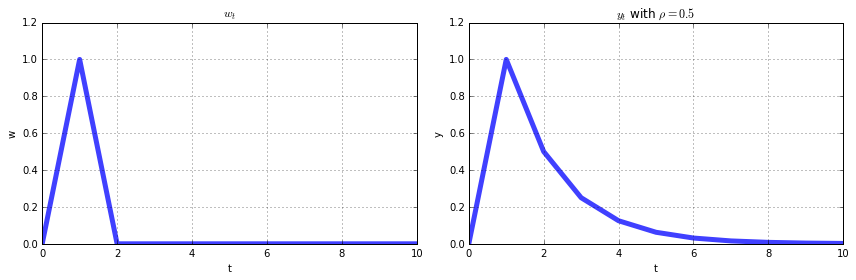

In [5]:
# Initialize the variable 'T' to be equal to the number of periods to simulate
T = 11

# Create new variable 'rho' equal to the value for rho
rho = 0.5

# Create new variable 'y' equal to the initial value for y
y0 = 0

# Initialize variable 'w' and set initial value
w = np.zeros(T)
w[1]=1

# Simulate y
y = diff1_example(rho,w,y0)

# Construct figure with two line graphs plotting the trajectories of y and w with:
#    1. Plot for w in left panel and plot for y in right panel
#    2. Clear title, x-, and y-axis labels
#    3. y-axis limits [0,1.2]

# Create figure
fig = plt.figure(figsize=(12,4))

# w trajectory
ax = fig.add_subplot(1,2,1)
ax.plot(w,'-',lw=5,alpha = 0.75)
ax.set_title('$w_t$')
ax.set_ylabel('w')
ax.set_xlabel('t')
ax.set_ylim([0,1.2])
ax.grid()

# y trajectory
ax = fig.add_subplot(1,2,2)
ax.plot(y,'-',lw=5,alpha = 0.75)
ax.set_title('$y_t$ with $\\rho=0.5$')
ax.set_ylabel('y')
ax.set_xlabel('t')
ax.set_ylim([0,1.2])
ax.grid()

# Use fig.tight_layout() to manage whitespace in the figure
fig.tight_layout()

In period 1, the *shock* to $w_t$ creates an exogenous increase in the process $y_t$. Since $y_{t+1}$ depends on the value of $y_{t}$, the transient or temporary shock to $w_t$ has a persistent effect on the series $y_t$. We call plots like those in the previous figure **impulse responses** because they depict the *responses* of variables to a one-time shock or *impulse* in the exogenous variable.

### Example: Temporary Shcok to $w_t$ for Different Values of $\rho$

Next, use the function `diff1_example()` to simulate $y$ for 11 periods with:
1. $\rho=0.2, 0.4, 0.8, 0.1$
2. $w_1 = 1$ and $w_0 = w_2 = \ldots = w_{10} = 0$ 
3. $y_0 = 0$
4. $\mu=0$

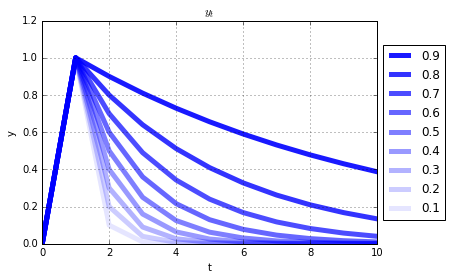

In [6]:
# Note: Since T, w, and y0 are already defined, there's no need to re-define them

# Create new variable 'rho' equal to the value for rho
rho = 0.95

# Construct a line graph plotting the trajectories of y with:
#    1. Clear title, x-, and y-axis labels
#    2. Y-axis limits [0,1.2]
#    3. Add a legend outside of the plot with arguments: loc='center left', bbox_to_anchor=(1, 0.5)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# Iterate over rho in [0.1, 0.2, 0.3, ... , 0.9]. Simulate y for each rho and plot. Set plot label equal to rho value
for rho in np.flip(np.arange(0.1,1,0.1)):
    y = diff1_example(rho,w,y0)
    plt.plot(y,'-b',lw=5,alpha = rho,label=str(round(rho,1)))
    
ax.set_title('$y_t$')
plt.ylabel('y')
plt.xlabel('t')
ax.set_ylim([0,1.2])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.grid()

Apparently increasing $\rho$ also increases the degree of persistence in the process $y$ following the shock to $w$. By $t=10$, the effects of the one-time increase in $w$ on $y$ have essentially dissipated for the simulations with $\rho= 0.1, 0.2, \ldots, 0.7$. But for $\rho=0.8$, the value of the $y$ is still above $0.15$ in period $10$ and for $\rho=0.9$, the process $y$ is nearly at $0.4$; i.e., nearly $40$ percent of the shock still remains. But regardless, in all cases it appears that $y$ approaches zero in the limit.

### Example: Temporary Shcok to $w_t$ for $\rho=-0.5$

Use the function `diff1_example()` to simulate $y$ for 11 periods with:
1. $\rho=-0.5$
2. $w_1 = 1$ and $w_0 = w_2 = \ldots = w_{10} = 0$ 
3. $y_0 = 0$
4. $\mu=0$

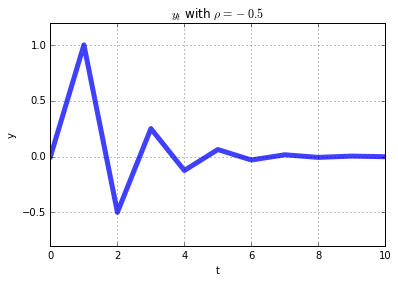

In [7]:
# Note: Since T, w, and y0 are already defined, there's no need to re-define them

# Create new variable 'rho' equal to the value for rho
rho = -0.5

# Simulate y
y = diff1_example(rho,w,y0)

# Construct a line graph plotting the trajectory of y with:
#    1. Plot for y stacked on top of plot for w
#    2. Clear title, x-, and y-axis labels
#    3. Y-axis limits [-0.8,1.2]

# Create figure
fig = plt.figure()

# y trajectory
ax = fig.add_subplot(1,1,1)
ax.plot(y,'-',lw=5,alpha = 0.75)
ax.set_title('$y_t$ with $\\rho=-0.5$')
ax.set_ylabel('y')
ax.set_xlabel('t')
ax.set_ylim([-0.8,1.2])
ax.grid()

With $\rho=-0.5$, the sign of the pricess $y$ oscilates between positive and negative values but the absolute value of $y$ smoothly converges to zero in the limit.

### Example: Temporary Shcok to $w_t$ for $\rho=1.5$ and $\rho=-1.5$

So far all of the values that we hav used for $\rho$ have been less than 1 in absolute value and in all cases, the process $y$ has returned to zero in the limit. But this may not always be the case. Let's consider the cases where $\rho=1.5$ and $\rho=-1.5$.

Use the function `diff1_example()` to simulate $y$ for 11 periods with:
1. $\rho=1.5$ (left panel) and $\rho=-1.5$ (right panel)
2. $w_1 = 1$ and $w_0 = w_2 = \ldots = w_{10} = 0$ 
3. $y_0 = 0$
4. $\mu=0$

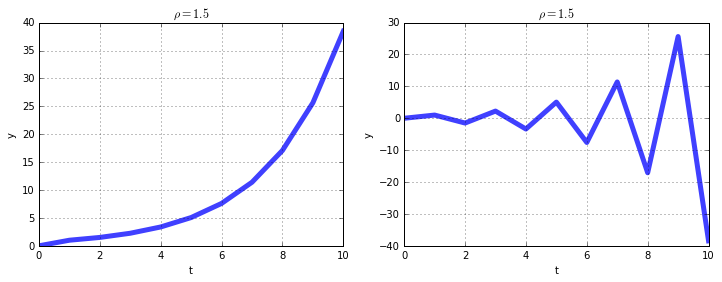

In [8]:
# Note: Since T, w, and y0 are already defined, there's no need to re-define them

# Create figure
fig = plt.figure(figsize=(12,4))

# Set rho=1.5
rho = 1.5

# Simulate y with rho = 1.5
y = diff1_example(rho,w,0)

# plot trajectory of y with rho = 1.5
ax = fig.add_subplot(1,2,1)

ax.plot(y,'-',lw=5,alpha = 0.75)
ax.set_title('$\\rho=1.5$')
ax.set_ylabel('y')
ax.set_xlabel('t')
ax.grid()

# Set rho=-1.5
rho = -1.5

# Simulate y with rho = -1.5
y = diff1_example(rho,w,0)

# plot trajectory of y with rho = -1.5
ax = fig.add_subplot(1,2,2)

ax.plot(y,'-',lw=5,alpha = 0.75)
ax.set_title('$\\rho=1.5$')
ax.set_ylabel('y')
ax.set_xlabel('t')
ax.grid()

Unlike the earlier simulations, the ones in the previous example do not return to zero and instead either explode toward infinity ($\rho = 1.5$) or oscillate towards positive and negative infinity. These two simulations are examples of *explosive processes* while the ones prior were examples of *stable processes*. In the next section, I elaborate on the notion of stability.



## Stability of first-Order Difference Equations

You might already see that the value of $\rho$ is important in determining the stability of the process $y$, but we can see clearly why. Suppose that $\mu=0$ (this just makes the argument more clear) and start with the equation for determining $y_1$:

\begin{align}
y_1 & = \rho y_0 + w_1
\end{align}

The value for $y_2$ is determined by an analogous equation:

\begin{align}
y_2 & = \rho y_1 + w_2
\end{align}

Then use the equation for $y_1$ to eliminate $y_1$ from the equation for $y_2$:

\begin{align}
y_2 & = \rho^2 y_0 + \rho w_1 + w_2
\end{align}

Continue this process to arrive at a formula that specifies the value of $y$ in period $T$ as a function of just $\rho$, $y_0$, and the values of $w$: $w_1, w_2, \ldots, w_T$:

\begin{align}
y_T & = \rho^T y_0 + \rho^{T-1} w_1 + \rho^{T-2} w_2 + \cdots + \rho w_{T-1} + w_T\\
\end{align}

Then, you can see that the marginal effect of $w_1$ on $y_T$ is:

\begin{align}
\frac{\partial y_T}{\partial w_T} & = \rho^T
\end{align}

From this, there are three facts:

1. If $|\rho^T|<0$, then the process $y$ is **stable** because $|\rho^T|\rightarrow 0$ as $T\rightarrow \infty$.
2. If $|\rho^T|>0$, then the process $y$ is **explosive** because $|\rho^T|\rightarrow 0$ as $T\rightarrow \infty$.
2. If $|\rho^T|=1$, then the process $y$ is neither stable nor explosive because $|\rho^T|\rightarrow 1$ as $T\rightarrow \infty$.

The final case, with $|\rho^T|=1$, is closely related to the *random walk* stochastic process that is often used to describe finacial asset returns over short time horizons. We will encounter this process later.

Stability is a fundamental concept in economics and thereare important roles for both model with stable and explosive properties.

### Application: The Perpetual Inventory Method

The stock of physical capital is a fundamental component of many macroeconomic models but measuring, and therefore acquiring data on, the value of a country's capital stock is hard. The challenge arise because it is hard to estimate the value of something that is not changing ownership in a transaction. What is value of a high-rise apartment building that has had the same owner for 50 years?

One way to overcome this challenge is to use the **perpetual inventory method**. The perpetual inventory method is based on the law of motion of the capital stock:

\begin{align}
K_{t+1} & = I_t + (1-\delta) K_t
\end{align}

where $K_t$ denotes physical capital, $I_t$ denotes investment (purchases of new capital), and $\delta$ denotes the rate of depreciation. Give $K_0$ and data on investment $I_0, I_1, \ldots,$, the the capital stock in periods $1, 2, \ldots$ can be computed iteratively. To obtain $K_0$, the method assumes that the economy is in  a steady state in the initial year. Recalle that in the steady state:

\begin{align}
I & = \delta K
\end{align}

So, set $K_0 = \delta{^-1} I_0$.

Steps:

1. Obtain real investment data (https://fred.stlouisfed.org/series/GPDICA)
2. Select a value for the depreciation rate $\delta$. 0.1 is a standard choice.
3. Initialize an array of zeros (or an empty array) to store capital values
4. Set the first value of the captial array equal to the $\delta^{-1} I_0$
5. Iterate over the values in the investment data to compute the remaining values of capital.

Read Timothy Kehoe's notes (http://users.econ.umn.edu/~tkehoe/classes/GrowthAccountingNotes.pdf) for more background on the perpetual inventory method if you're interested.

In [9]:
# Import real investment data from FRED into a DataFrame called `data` (PROVIDED)
data = pd.read_csv('https://fred.stlouisfed.org/data/GPDICA.txt',sep='\s+',skiprows=13,index_col=0,parse_dates=True)

# Set the column attribute of data to ['Investment']
data.columns = ['Investment']

# Set the index.name attribute of data to 'Date'
data.index.name='Date'

# Set a value for delta
delta = 0.1

# Create a variable called 'capital' equal to an array of zeros as long as data
capital = np.arange(len(data))

# Set the initial value of capital equal to initial investment divided by delta
capital[0] = data['Investment'].iloc[0]/delta

# Iterate over i in i in range(len(capital)-1) to construct values in the capital array
for i in range(len(capital)-1):
    capital[i+1] = data['Investment'].iloc[i] + (1-delta)*capital[i]
    
# Add a 'Capital' column to data
data['Capital'] = capital

# Divide data by 1000 so that the data are in units are in trillions of $ (instead of billions)
data = data/1000

# Print the first 5 rows of data
print(data.head())

            Investment  Capital
Date                           
1929-01-01    0.120381    1.203
1930-01-01    0.081988    1.203
1931-01-01    0.053297    1.164
1932-01-01    0.019658    1.100
1933-01-01    0.026589    1.009


Now construct a figure that contains a plot of capital in the top panel and investment in the bottom panel.

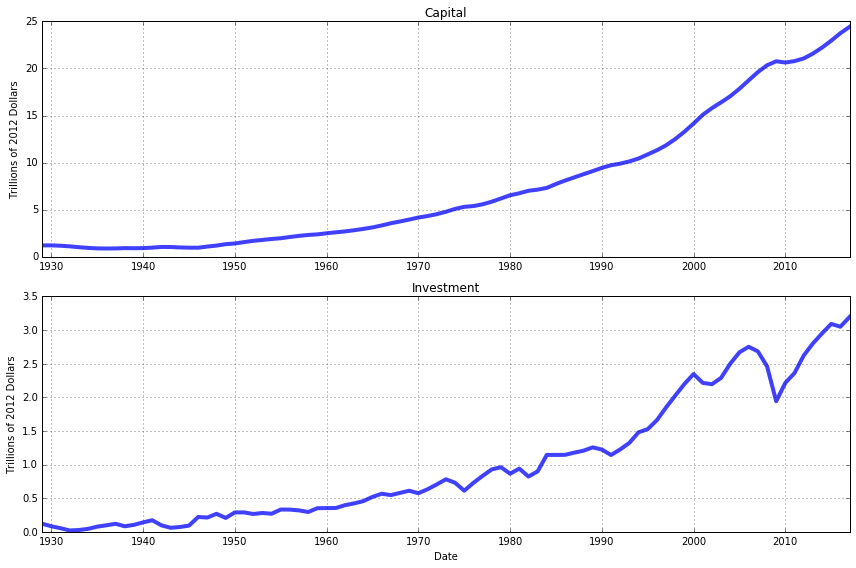

In [10]:
# Create figure
fig = plt.figure(figsize=(12,8))

# Construct plot of capital
ax1 = fig.add_subplot(2,1,1)
ax1.plot(data.index,data.Capital,lw=4,alpha=0.75)
ax1.set_ylabel('Trillions of 2012 Dollars')
ax1.set_title('Capital')
ax1.grid()

ax2 = fig.add_subplot(2,1,2)
ax2.plot(data.index,data.Investment,lw=4,alpha=0.75)
ax2.set_ylabel('Trillions of 2012 Dollars')
ax2.set_xlabel('Date')
ax2.set_title('Investment')
ax2.grid()

fig.tight_layout()

**Question**

1. Why does the computed capital series fluctuate less than the investment data?
2. Given that there are about 325 million people in the US, does the computed value in the last year look large, small, or about right on a per capita basis?

**Answer**

1. Because 10 percent rate of capital accumulation implies an autoregressive coefficent on capital of 0.9 so changes in capital are highly persistent.<!-- answer -->
2. 25 trillion divided by 325 million is about 77,000 which seems to be in the right ballpark. Note that that the amount of capital in the US *per worker* will be an order of magnitude higher since there is a stubstantial share of people not in the workforce: e.g., children, retired persons, institutionalized persons.<!-- answer -->